# Question 2

In [1]:
# import packages
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# 讀取資料集，和預覽資料
train_data = pd.read_csv("HW2-1.csv")
print("data_len: ", len(train_data))
raw_data = train_data.values
train_data.head()

data_len:  50


,U1,U2
0,0.814291,-0.282982
1,-0.557005,-0.221874
2,0.041433,-0.271074
3,0.999120,-0.001757
4,-0.836723,-0.592460


In [3]:
# 客製化我們的模型
class OurAnomalyDetector(tf.keras.Model):
  def __init__(self):
    super(OurAnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation = "tanh"),
      layers.Dense(16, activation = "tanh"),
      layers.Dense(8, activation = "tanh")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation = "tanh"),
      layers.Dense(16, activation = "tanh"),
      layers.Dense(2, activation = 'tanh')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = OurAnomalyDetector()

In [4]:
# 訓練模型
autoencoder.compile(optimizer = 'adam', loss = 'mae')
history = autoencoder.fit(raw_data, raw_data, epochs = 20)

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4499
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3857
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2337
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2092
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1636
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1355
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1111
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1004
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.

In [5]:
# 產生新資料
encoded_data = autoencoder.encoder(raw_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()
decoded_data

array([[ 0.7275164 , -0.27410752],
       [-0.6405492 , -0.22224966],
       [ 0.03306295, -0.30581805],
       [ 0.80797666, -0.13215576],
       [-0.7850316 , -0.36816424],
       [-0.27159575, -0.22879426],
       [ 0.5399936 , -0.37352937],
       [-0.4401112 , -0.20053865],
       [ 0.43659723, -0.37906978],
       [-0.79240286, -0.38460827],
       [-0.49123353, -0.19770288],
       [ 0.07438851, -0.31627846],
       [-0.7464848 , -0.3045561 ],
       [ 0.06509383, -0.31394994],
       [ 0.4051368 , -0.37743333],
       [ 0.44051135, -0.3791845 ],
       [ 0.48590603, -0.3788458 ],
       [ 0.69105774, -0.3092692 ],
       [ 0.6424003 , -0.34109393],
       [-0.7674058 , -0.3352422 ],
       [-0.15191926, -0.25770482],
       [-0.19432127, -0.24702911],
       [ 0.39803687, -0.37690133],
       [ 0.6075675 , -0.35635012],
       [ 0.06366602, -0.31359085],
       [ 0.17301482, -0.3397619 ],
       [-0.81574404, -0.45497328],
       [ 0.39995474, -0.37705058],
       [-0.57816565,

In [6]:
# 將二維 array 轉成 2個 list(x軸, y軸)
h = decoded_data.tolist()
x_axis = []
y_axis = []
for x in h:
    x_axis.append(x[0])
    y_axis.append(x[1])

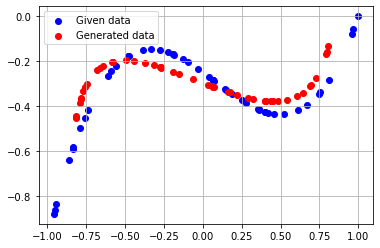

In [7]:
# 繪圖
plt.grid()
plt.scatter(train_data['U1'], train_data['U2'], c = "blue")
plt.scatter(x_axis, y_axis, c = "red")
plt.legend(labels=["Given data", "Generated data"])
plt.show()